### Imports

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mglearn
plt.rcParams["figure.figsize"] = [10, 6]

### Data

X.shape: (26, 2)


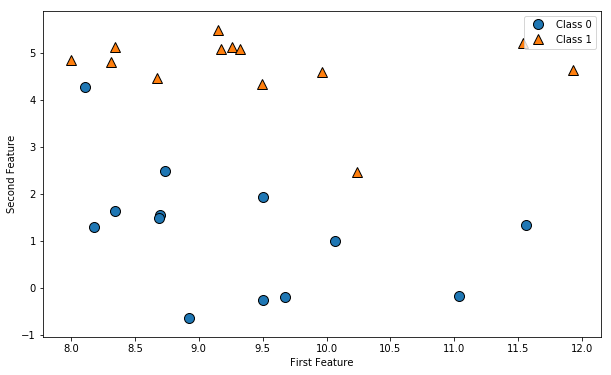

In [2]:
X, y = mglearn.datasets.make_forge()
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["Class 0", "Class 1"], loc=1)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
print("X.shape: {}".format(X.shape))

Text(0,0.5,'Target')

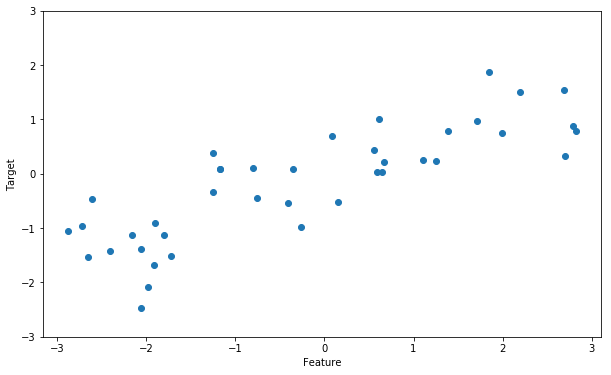

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("Feature")
plt.ylabel("Target")

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [5]:
print(cancer.data.shape)

(569, 30)


In [6]:
for item in zip(cancer.target_names,np.bincount(cancer.target)):
    print(item)

('malignant', 212)
('benign', 357)


In [7]:
print("Sample counts per class:\n{}".format(
    {n:v for n,v in zip(cancer.target_names, np.bincount(cancer.target))}
))

Sample counts per class:
{'malignant': 212, 'benign': 357}


In [8]:
print("Feature names:\n {}".format(cancer.feature_names))

Feature names:
 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [9]:
from sklearn.datasets import load_boston
boston = load_boston()
print("Data shape: {}".format(boston.data.shape))

Data shape: (506, 13)


In [10]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


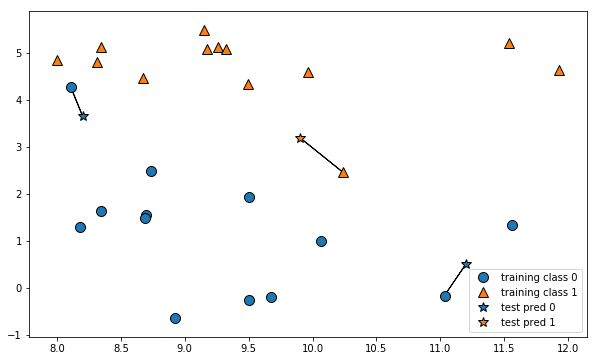

In [11]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

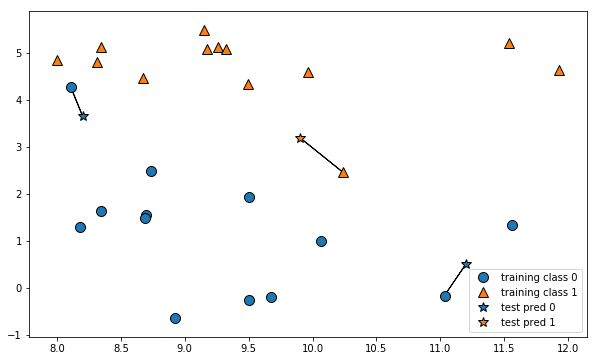

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

### K-Nearest Neighbors

###### General

In [13]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [15]:
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8571428571428571

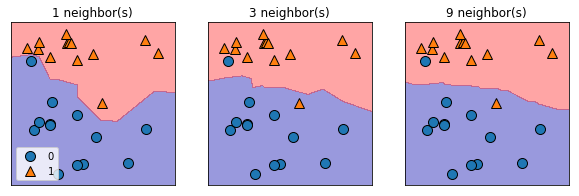

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))
axes
for n_neighbours, ax in zip([1, 3, 9], axes):
    clf = KNeighborsClassifier(n_neighbors=n_neighbours).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax = ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbours))
axes[0].legend(loc=3)
    

###### Breast Cancer Dataset

In [17]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify = cancer.target, random_state = 66)

In [18]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 11)

In [19]:
for n_neighbors in neighbors_settings:
    clf= KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    test_accuracy.append(clf.score(X_test, y_test))

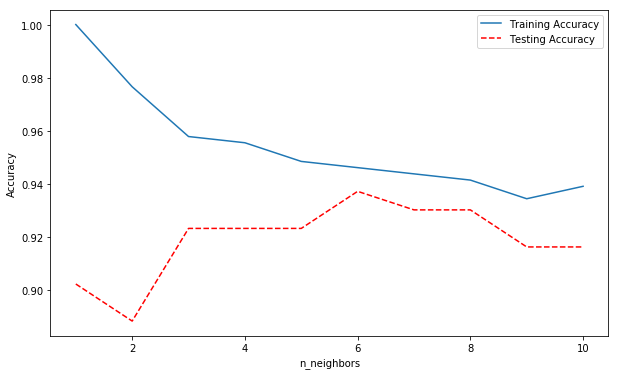

In [20]:
plt.plot(neighbors_settings, training_accuracy, label = "Training Accuracy")
plt.plot(neighbors_settings, test_accuracy, 'r--', label = "Testing Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

###### K-Nearest Neighbors Regression

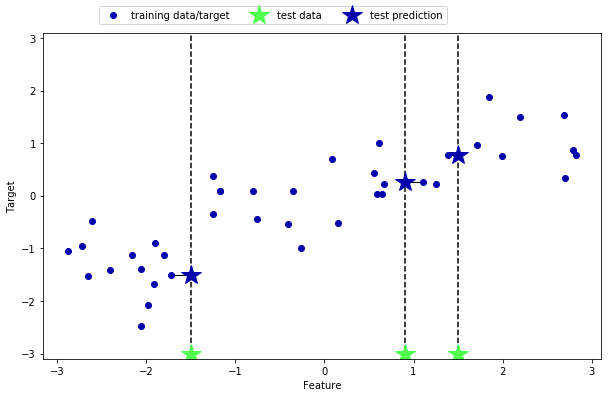

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

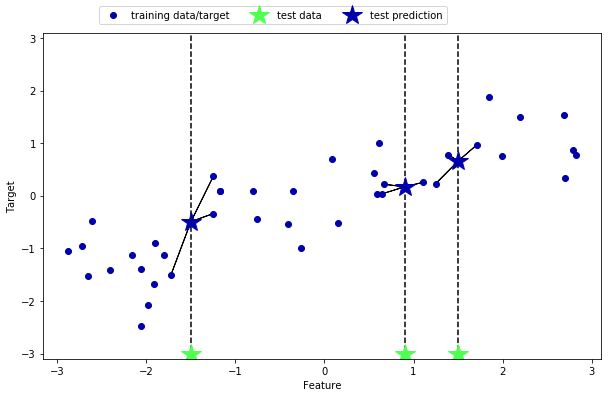

In [22]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [23]:
from sklearn.neighbors import KNeighborsRegressor

In [24]:
X, y = mglearn.datasets.make_wave(n_samples=40)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [26]:
reg = KNeighborsRegressor(n_neighbors=3)
reg.fit(X_train, y_train)
print("Training score: {:.4f}".format(reg.score(X_train, y_train)))
print("Test score: {:.4f}".format(reg.score(X_test, y_test)))

Training score: 0.8194
Test score: 0.8344


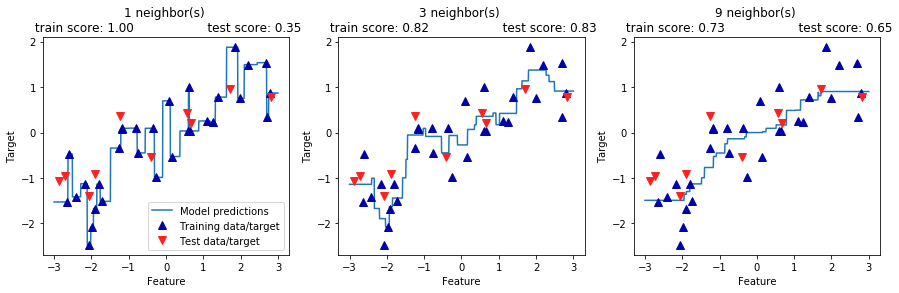

In [27]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    reg = KNeighborsRegressor(n_neighbors = n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    ax.set_title("{} neighbor(s) \n train score: {:.2f} \
                  test score: {:.2f}".format(n_neighbors, 
                                             reg.score(X_train, y_train),
                                             reg.score(X_test, y_test)
                                            )
                )
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
    axes[0].legend(["Model predictions", "Training data/target", "Test data/target"], loc="best")



    

### Linear Regression

###### General Linear Regression

w[0]: 0.393906  b: -0.031804


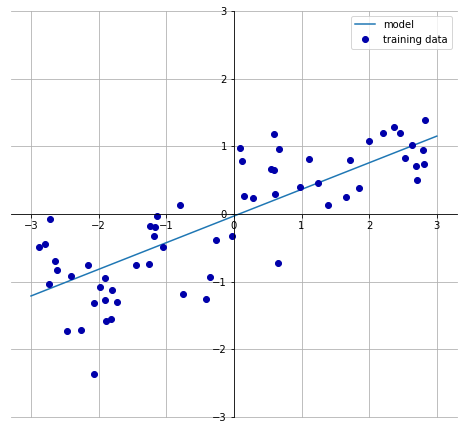

In [28]:
mglearn.plots.plot_linear_regression_wave()

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)

In [31]:
print(lr.coef_)
print(lr.intercept_)

[ 0.39390555]
-0.0318043430268


In [32]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [33]:
X, y = mglearn.datasets.load_extended_boston()

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [35]:
lr = LinearRegression().fit(X_train, y_train)

In [36]:
lr.score(X_train, y_train)

0.95235264368642414

In [37]:
lr.score(X_test, y_test)

0.60577548929357028

###### Ridge Regression

This makes the coefficients as close to zero as possible. Generalizes well for lower  alpha values. Uses L2 Regularization

In [38]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)

In [39]:
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [40]:
alphavalues = [0.1, 1, 2, 3, 4, 5 ,6 ,7 ,8 , 9, 10]
for vals in alphavalues:
    ridge = Ridge(alpha=vals).fit(X_train,y_train)
    print("Alpha: {}, Training score: {:.2f}, Test score: {:.2f}".format(
        vals, ridge.score(X_train, y_train), ridge.score(X_test, y_test)
    ))
    

Alpha: 0.1, Training score: 0.93, Test score: 0.77
Alpha: 1, Training score: 0.89, Test score: 0.75
Alpha: 2, Training score: 0.86, Test score: 0.73
Alpha: 3, Training score: 0.85, Test score: 0.71
Alpha: 4, Training score: 0.83, Test score: 0.69
Alpha: 5, Training score: 0.82, Test score: 0.68
Alpha: 6, Training score: 0.81, Test score: 0.67
Alpha: 7, Training score: 0.81, Test score: 0.66
Alpha: 8, Training score: 0.80, Test score: 0.65
Alpha: 9, Training score: 0.79, Test score: 0.64
Alpha: 10, Training score: 0.79, Test score: 0.64


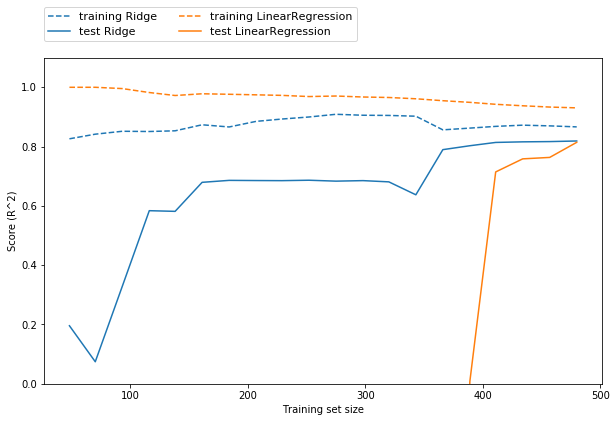

In [41]:
mglearn.plots.plot_ridge_n_samples()

###### Lasso Regression

This also regularizes by making coefficients as close to zero as possible. some of them are actually zero thereby ignoring certain features altogether. Automatic feature selection. Uses L1 Regularization

In [42]:
from sklearn.linear_model import Lasso

In [43]:
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [44]:
lasso001 = Lasso(alpha=0.01, max_iter = 100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


### Linear models for Classification

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [46]:
X, y = mglearn.datasets.make_forge()

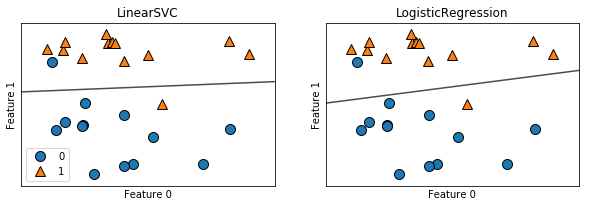

In [47]:
fig, axes = plt.subplots(1, 2, figsize =(10, 3))

for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
    clf = model.fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5, ax=ax, alpha=.7)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{}".format(clf.__class__.__name__))
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend()

###### Breast cancer Dataset

In [48]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [49]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify = cancer.target,
                                                    random_state=42)

In [50]:
logreg = LogisticRegression().fit(X_train, y_train)

In [51]:
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.958


In [52]:
logreg100 = LogisticRegression(C=100).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.972
Test set score: 0.965


In [53]:
logreg001 = LogisticRegression(C=0.01).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.934
Test set score: 0.930


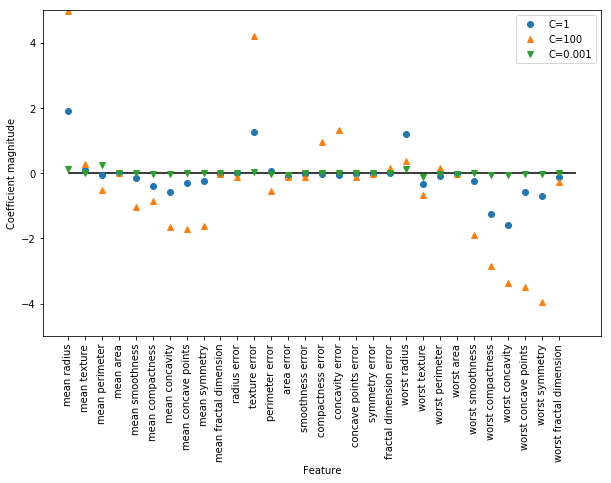

In [54]:
plt.plot(logreg.coef_.T, 'o', label='C=1')
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001 : 0.913
Test accuracy of l1 logreg with C=0.001 : 0.923
Training accuracy of l1 logreg with C=1.000 : 0.960
Test accuracy of l1 logreg with C=1.000 : 0.958
Training accuracy of l1 logreg with C=100.000 : 0.986
Test accuracy of l1 logreg with C=100.000 : 0.979


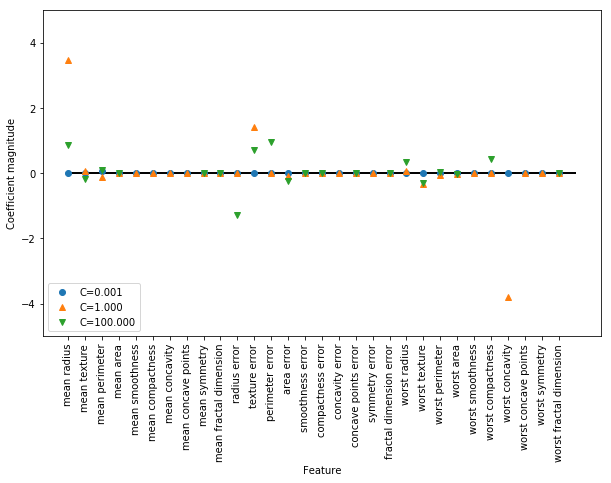

In [55]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, penalty='l1').fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f} : {:.3f}".format(C, 
                                                            lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f} : {:.3f}".format(C,
                                                            lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))
    plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
    plt.hlines(0, 0 , cancer.data.shape[1])
    plt.xlabel("Feature")
    plt.ylabel("Coefficient magnitude")
    plt.ylim(-5, 5)
    plt.legend(loc=3)

### Linear models for Multiclass Classification

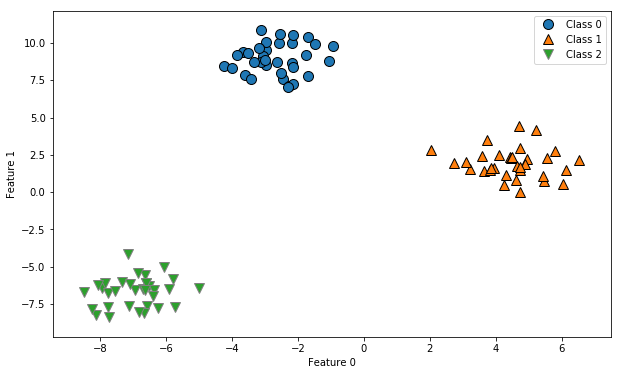

In [56]:
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [57]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape)
print("Intercept shape:", linear_svm.intercept_.shape)

Coefficient shape:  (3, 2)
Intercept shape: (3,)


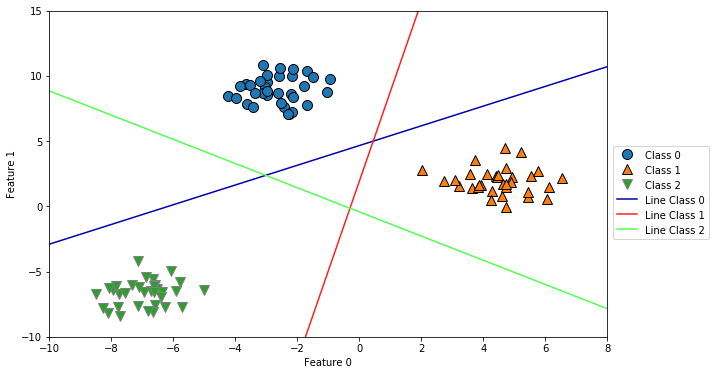

In [58]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    plt.ylim(-10, 15)
    plt.xlim(-10, 8)
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")
    plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line Class 0', 'Line Class 1',
                'Line Class 2'], loc=(1.01, 0.3))

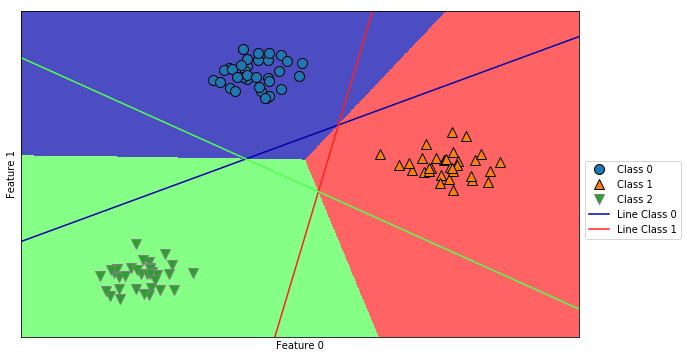

In [59]:
mglearn.plots.plot_2d_classification(linear_svm, X, fill=True, alpha=0.7)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_, mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
    plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line Class 0', 'Line Class 1'], loc=(1.01, 0.3))
    plt.xlabel("Feature 0")
    plt.ylabel("Feature 1")

**Notes**
1. Higher Alpha values and lower C values offer better Generalization.

1. Lower Alpha values and higher C values overfit

1. Choose L1 Regularization if you think only few features are important and also want to   see what those features are, otherwise choose L2

### Naive Bayes Classifier

In [60]:
X = np.array([[0, 1, 0, 1],
              [1, 0, 1, 1],
              [0, 0, 0, 1],
              [1, 0, 1, 0]
            ])
y = np.array([0, 1, 0, 1])

In [61]:
counts = {}
for label in np.unique(y):
    counts[label] = X[y==label].sum(axis=0)
print("Feature counts:\n{}".format(counts))

Feature counts:
{0: array([0, 1, 0, 2]), 1: array([2, 0, 2, 1])}


### Decision Trees

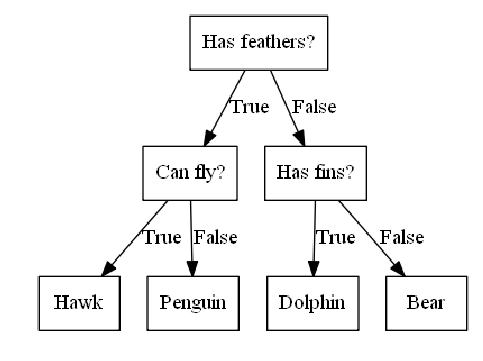

In [62]:
mglearn.plots.plot_animal_tree()

###### Breast Cancer dataset

In [63]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify = cancer.target,
                                                    random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


Overfitting!!

Limit the depth of the Tree

In [64]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


###### Visualizing the Decision Tree

In [65]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot",
                class_names=['malignant', 'benign'],
                feature_names=cancer.feature_names,
                impurity=False, filled=True)

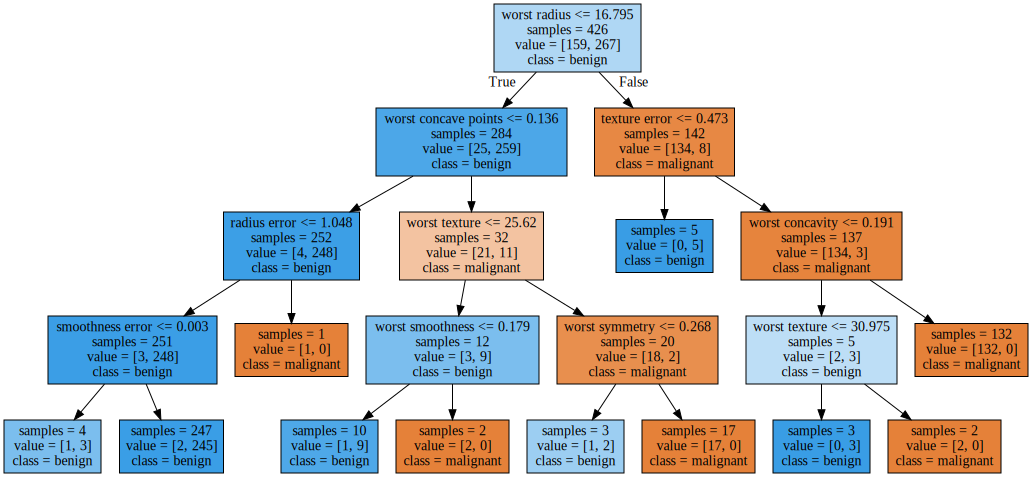

In [66]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()

display(graphviz.Source(dot_graph))

Feature Importances

In [67]:
print("Feature importances: \n {}".format(tree.feature_importances_))

Feature importances: 
 [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.01019737  0.04839825  0.          0.
  0.0024156   0.          0.          0.          0.          0.
  0.72682851  0.0458159   0.          0.          0.0141577   0.          0.018188
  0.1221132   0.01188548  0.        ]


Plotting the Feature importances

In [68]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

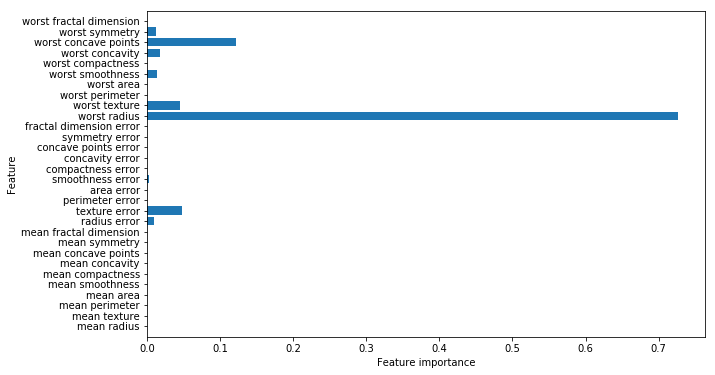

In [69]:
plot_feature_importances_cancer(tree)

Notes

1. High feature importance does not equal high probability of one class or the other.
1. A low feature importance does not mean that the feature is completely useless.    Decision tree might have chosen another feature that encoded the same information.
1. Feature importances are always positive unlike coefficients in Linear models 

###### Relationship between features and classes is complex

Feature importances: [ 0.  1.]


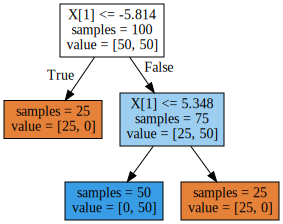

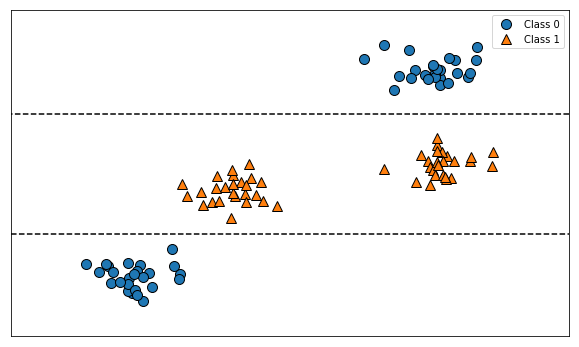

In [70]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

###### Decision Tree Regressor

Note: Decision Tree Regressor DOES NOT EXTRAPOLATE for ranges outside the training data

Text(0,0.5,'Price in $/Mbyte')

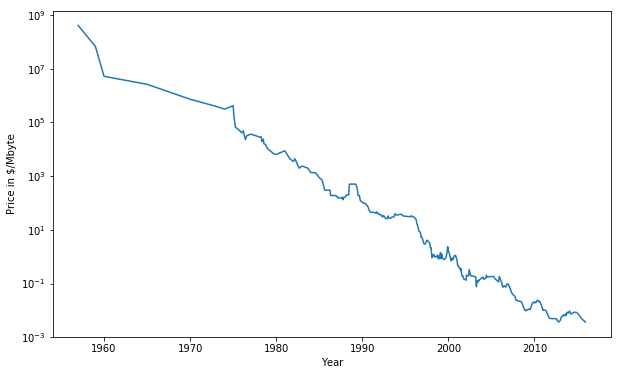

In [71]:
import os 
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("Year")
plt.ylabel("Price in $/Mbyte")

In [72]:
from sklearn.tree import DecisionTreeRegressor
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

In [73]:
X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

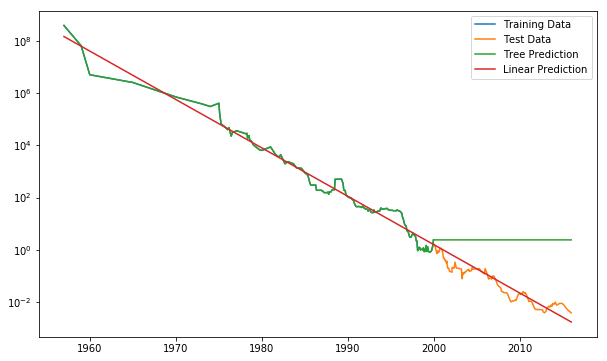

In [74]:
plt.semilogy(data_train.date, data_train.price, label="Training Data")
plt.semilogy(data_test.date, data_test.price, label="Test Data")
plt.semilogy(ram_prices.date, price_tree, label="Tree Prediction")
plt.semilogy(ram_prices.date, price_lr, label="Linear Prediction")
plt.legend()


### Ensemble Methods

#### Random Forests

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

In [76]:
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state=42)
forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5, n_jobs=1,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

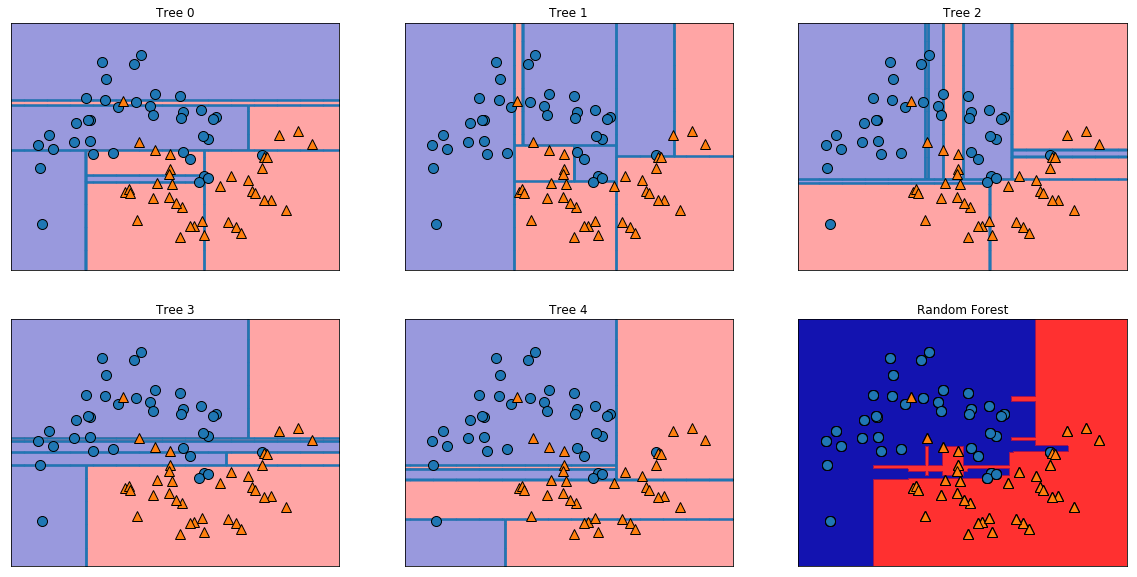

In [77]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1], alpha=.4)
    axes[-1, -1].set_title("Random Forest")
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

###### Breast Cancer Dataset

In [78]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on training set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on training set: 0.972


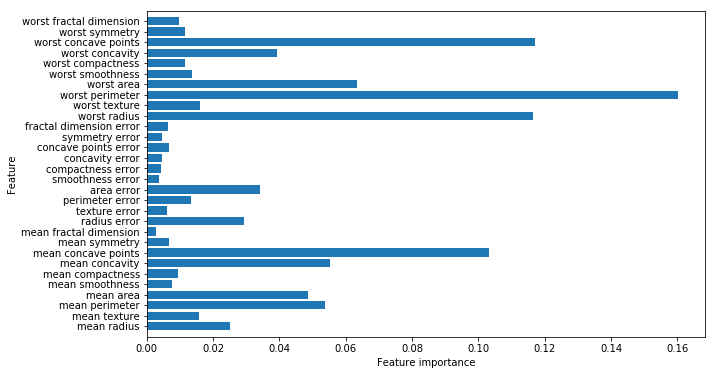

In [79]:
plot_feature_importances_cancer(forest)

Notes

1. use max_features = sqrt(n_features) for classification
1. use max_features = n_features for regression

#### Gradient Boosted regression trees (Gradient boosting machines)

###### Breast Cancer dataset

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

In [81]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on training set: 0.958


In [82]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)

gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on training set: 0.972


In [83]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)

gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on training set: 0.965


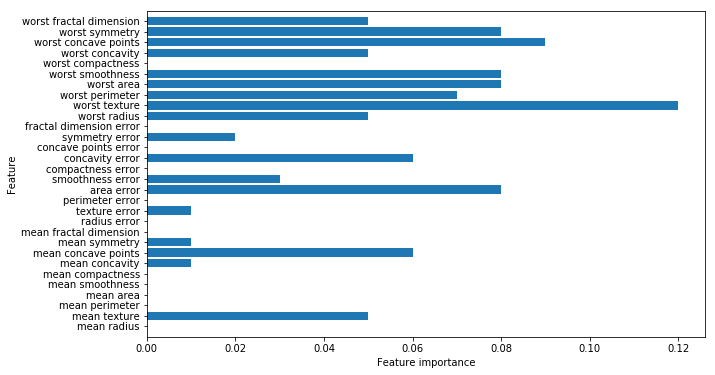

In [84]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)
plot_feature_importances_cancer(gbrt)

### Neural Networks

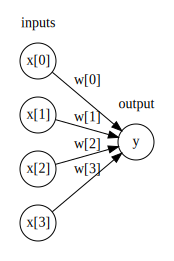

In [88]:
display(mglearn.plots.plot_logistic_regression_graph())

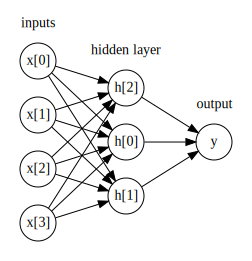

In [89]:
display(mglearn.plots.plot_single_hidden_layer_graph())

Text(0,0.5,'relu(x), tanh(x)')

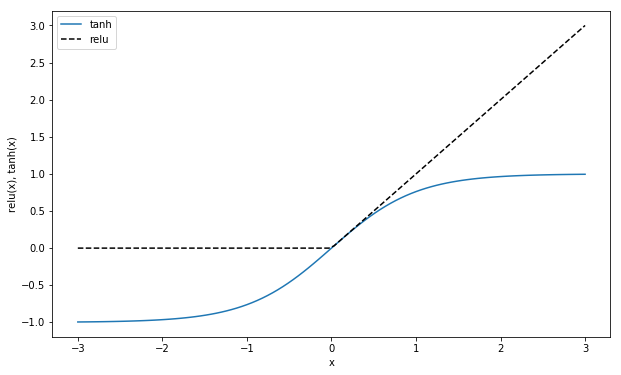

In [96]:
line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label="tanh")
plt.plot(line, np.maximum(line, 0),'k--', label="relu")
plt.legend(loc="best")
plt.xlabel("x")
plt.ylabel("relu(x), tanh(x)")

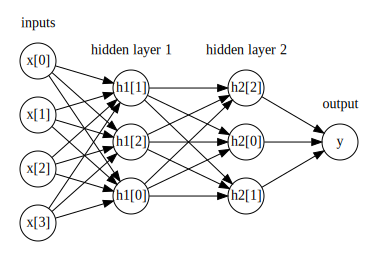

In [97]:
mglearn.plots.plot_two_hidden_layer_graph()

In [98]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons

In [99]:
X, y = make_moons(n_samples=100, noise = 0.25, random_state=3)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                   random_state=42)

Text(0,0.5,'Feature 1')

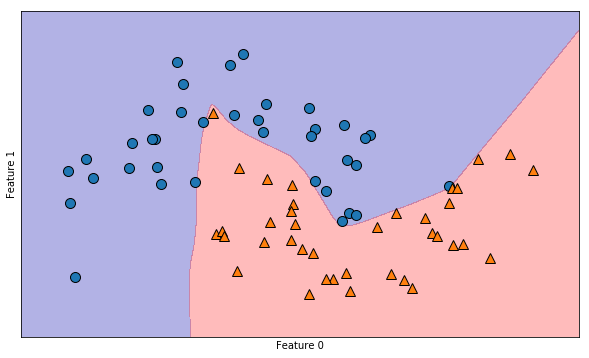

In [110]:
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

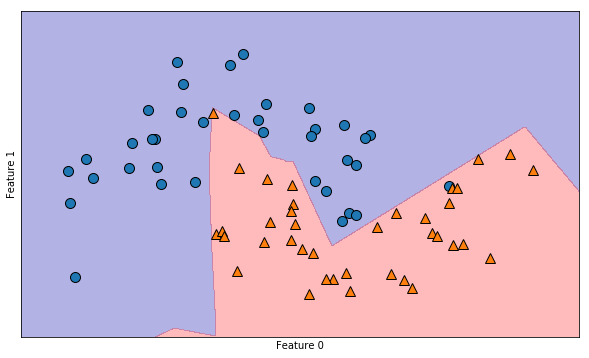

In [111]:
#using two hidden layers with 10 units each
mlp = MLPClassifier(solver='lbfgs', random_state=0,
                   hidden_layer_sizes=[10, 10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0,0.5,'Feature 1')

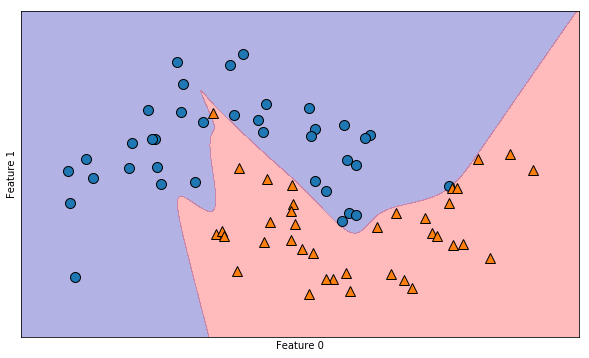

In [112]:
# using 2 layers with 10 units each but using tanh
mlp = MLPClassifier(solver='lbfgs', activation='tanh', random_state=0, 
                    hidden_layer_sizes= [10, 10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train, fill=True, alpha=.3)
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

### Uncertainty Estimates from Classifiers

In [113]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles

In [114]:
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

In [115]:
y_named = np.array(["blue", "red"]) [y]

In [116]:
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
train_test_split(X, y_named, y, random_state=0)

In [118]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [119]:
print("X_test.shape: {}".format(X_test.shape))
print("Decision function shape: {}".format(gbrt.decision_function(X_test).shape))

X_test.shape: (25, 2)
Decision function shape: (25,)


In [120]:
print(gbrt.decision_function(X_test))

[ 4.13592629 -1.7016989  -3.95106099 -3.62599351  4.28986668  3.66166106
 -7.69097177  4.11001634  1.10753883  3.40782247 -6.46262729  4.28986668
  3.90156371 -1.20031192  3.66166106 -4.17231209 -1.23010022 -3.91576275
  4.03602808  4.11001634  4.11001634  0.65708962  2.69826291 -2.65673325
 -1.86776597]


In [122]:
gbrt.decision_function(X_test)>0

array([ True, False, False, False,  True,  True, False,  True,  True,
        True, False,  True,  True, False,  True, False, False, False,
        True,  True,  True,  True,  True, False, False], dtype=bool)

In [129]:
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
pred = gbrt.classes_[greater_zero]
print("pred is equal to predictions: {}".format(np.all(pred == gbrt.predict(X_test))))

pred is equal to predictions: True


In [130]:
decision_function = gbrt.decision_function(X_test)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(
    np.min(decision_function), np.max(decision_function)
))

Decision function minimum: -7.69 maximum: 4.29


In [131]:
print(gbrt.predict_proba(X_test).shape)

(25, 2)


In [133]:
gbrt.predict_proba(X_test[:6])

array([[ 0.01573626,  0.98426374],
       [ 0.84575649,  0.15424351],
       [ 0.98112869,  0.01887131],
       [ 0.97406775,  0.02593225],
       [ 0.01352142,  0.98647858],
       [ 0.02504637,  0.97495363]])